In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('./Data/train.csv')
print("Length of training data: ", len(data))

Length of training data:  31390


In [3]:
data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [4]:
data = data.drop(['data_source'], axis=1)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
seq_id,31390.0,15694.500000,9061.656811,0.00,7847.25,15694.5,23541.75,31389.0
pH,31104.0,6.892339,1.612225,1.99,7.00,7.0,7.00,64.9
tm,31390.0,49.147337,14.010089,-1.00,42.10,48.0,53.80,130.0


In [6]:
data = data[data['pH'] <= 14]

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
seq_id,31075.0,15609.536444,9035.340077,0.00,7798.5,15574.0,23358.5,31389.0
pH,31075.0,6.850945,0.859904,1.99,7.0,7.0,7.0,11.0
tm,31075.0,49.191688,13.986443,-1.00,42.1,48.1,53.8,130.0


In [8]:
data.isnull().sum()

seq_id              0
protein_sequence    0
pH                  0
tm                  0
dtype: int64

In [9]:
data.shape

(31075, 4)

In [10]:
data['pH'] = data['pH'].fillna(data['pH'].mean())

In [11]:
amino_acids = {'A', 'R', 'N', 'D', 'E', 'C', 'Q', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V'}

In [12]:
for amino_acid in amino_acids:
    data[amino_acid] = data['protein_sequence'].apply(lambda seq: seq.count(amino_acid)/len(seq))

In [13]:
data.head()

,seq_id,protein_sequence,pH,tm,Q,I,N,L,A,G,...,P,T,C,H,K,R,D,S,V,M
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,0.017595,0.041056,0.014663,0.108504,0.131965,0.111437,...,0.052786,0.041056,0.002933,0.008798,0.046921,0.073314,0.038123,0.032258,0.108504,0.023460
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,0.076923,0.045455,0.020979,0.080420,0.097902,0.062937,...,0.027972,0.041958,0.000000,0.013986,0.066434,0.104895,0.034965,0.048951,0.045455,0.006993
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,0.050302,0.032193,0.030181,0.036217,0.100604,0.130785,...,0.040241,0.060362,0.018109,0.022133,0.078471,0.062374,0.054326,0.066398,0.060362,0.012072
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,0.033962,0.037736,0.033962,0.105660,0.075472,0.060377,...,0.060377,0.071698,0.018868,0.026415,0.064151,0.037736,0.071698,0.060377,0.052830,0.007547
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,0.037216,0.048932,0.044797,0.071675,0.059269,0.057891,...,0.088215,0.082702,0.009649,0.027567,0.046864,0.043418,0.053756,0.101999,0.085458,0.021365


Text(0.5, 1.0, 'Ph VS tm')

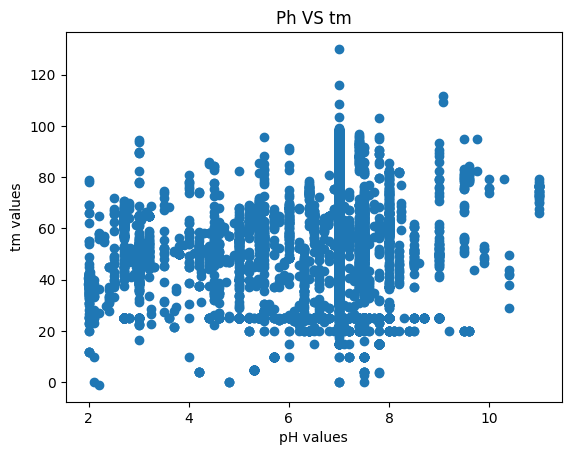

In [14]:
# Plotting the relation between pH and tm

pH = data['pH']
tm = data['tm']
plt.scatter(pH, tm)
plt.xlabel('pH values')
plt.ylabel('tm values')
plt.title('Ph VS tm')

In [15]:
# CALCULATING CHEMICAL PROPERTIES OF PROTEIN SEQUENCES

def calcualteAromaticity(row):
    seq = str(row[1])
    X = ProteinAnalysis(seq)
    return X.aromaticity()

def calcualteIsoElectricPoint(row):
    seq = str(row[1])
    X = ProteinAnalysis(seq)
    return X.isoelectric_point()

def calcualteMolecularWeight(row):
    seq = str(row[1])
    X = ProteinAnalysis(seq)
    return X.molecular_weight()

def calcualteChargeAtPh(row):
    seq = str(row[1])
    ph = row[2]
    X = ProteinAnalysis(seq)
    return X.charge_at_pH(ph)
def calculateGravy(row):
    seq = str(row[1])
    X = ProteinAnalysis(seq)
    return X.gravy()
def calculateLength(row):
    seq = str(row[1])
    return len(seq)

In [16]:
data['aromaticity'] = data.apply(calcualteAromaticity, axis=1)
data['isoelectric_point'] = data.apply(calcualteIsoElectricPoint, axis=1)
data['molecular_weight'] = data.apply(calcualteMolecularWeight, axis=1)
data['charge'] = data.apply(calcualteChargeAtPh, axis=1)
data['gravy'] = data.apply(calculateGravy, axis=1)
data['length'] = data.apply(calculateLength, axis=1)

In [17]:
data.head()

,seq_id,protein_sequence,pH,tm,Q,I,N,L,A,G,...,D,S,V,M,aromaticity,isoelectric_point,molecular_weight,charge,gravy,length
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,0.017595,0.041056,0.014663,0.108504,0.131965,0.111437,...,0.038123,0.032258,0.108504,0.023460,0.058651,6.109589,36320.7244,-1.872851,0.148094,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,0.076923,0.045455,0.020979,0.080420,0.097902,0.062937,...,0.034965,0.048951,0.045455,0.006993,0.041958,5.144349,32837.9931,-12.720355,-1.089510,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,0.050302,0.032193,0.030181,0.036217,0.100604,0.130785,...,0.054326,0.066398,0.060362,0.012072,0.080483,9.032101,53428.8034,11.730622,-0.710463,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,0.033962,0.037736,0.033962,0.105660,0.075472,0.060377,...,0.071698,0.060377,0.052830,0.007547,0.071698,4.683840,29475.5996,-20.561692,-0.507925,265
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,0.037216,0.048932,0.044797,0.071675,0.059269,0.057891,...,0.053756,0.101999,0.085458,0.021365,0.065472,5.917928,158761.9814,-21.664651,-0.400896,1451


In [18]:
y = data['tm']
x = data.drop(['seq_id', 'protein_sequence', 'tm'], axis=1)

In [19]:
# def prepare_testing_data():
labels = pd.read_csv('./Data/test_labels.csv')
test = pd.read_csv('./Data/test.csv')

In [20]:
labels.head()

,seq_id,tm
0,31390,77.3
1,31391,77.3
2,31392,77.3
3,31393,76.6
4,31394,77.4


In [21]:
test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [22]:
x_test = test.drop(['data_source'], axis=1)
for amino_acid in amino_acids:
    x_test[amino_acid] = x_test['protein_sequence'].apply(lambda seq: seq.count(amino_acid)/len(seq))
    
x_test['aromaticity'] = x_test.apply(calcualteAromaticity, axis=1)
x_test['isoelectric_point'] = x_test.apply(calcualteIsoElectricPoint, axis=1)
x_test['molecular_weight'] = x_test.apply(calcualteMolecularWeight, axis=1)
x_test['charge'] = x_test.apply(calcualteChargeAtPh, axis=1)
x_test['gravy'] = x_test.apply(calculateGravy, axis=1)
x_test['length'] = x_test.apply(calculateLength, axis=1)
x_test.head()

,seq_id,protein_sequence,pH,Q,I,N,L,A,G,E,...,D,S,V,M,aromaticity,isoelectric_point,molecular_weight,charge,gravy,length
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,0.058824,0.027149,0.085973,0.045249,0.099548,0.085973,0.036199,...,0.067873,0.081448,0.058824,0.0,0.099548,8.751535,23910.2619,2.558953,-0.771041,221
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,0.058824,0.027149,0.085973,0.045249,0.099548,0.085973,0.031674,...,0.067873,0.081448,0.058824,0.0,0.099548,9.024494,23909.3202,4.548770,-0.772851,221
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,0.059091,0.027273,0.086364,0.045455,0.100000,0.086364,0.031818,...,0.068182,0.081818,0.059091,0.0,0.100000,8.907484,23781.1479,3.558671,-0.758636,220
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,0.058824,0.027149,0.085973,0.049774,0.099548,0.085973,0.031674,...,0.067873,0.081448,0.058824,0.0,0.099548,8.699638,23869.2761,2.477663,-0.709050,221
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,0.058824,0.027149,0.085973,0.049774,0.099548,0.085973,0.031674,...,0.067873,0.081448,0.058824,0.0,0.104072,8.761012,23913.3070,2.568572,-0.707692,221


In [23]:
y_test = labels['tm']
x_test = x_test.drop(['seq_id', 'protein_sequence'], axis=1)
print("Length of testing data: ", len(x_test))

Length of testing data:  2413


In [24]:
print("Number of features: ", len(x_test.iloc[0]))

Number of features:  27


In [25]:
hr = HuberRegressor(epsilon=1.85, max_iter=200, alpha=0.01, warm_start=False, fit_intercept=True, tol=1e-04)
hr.fit(x, y)

HuberRegressor(alpha=0.01, epsilon=1.85, max_iter=200, tol=0.0001)

In [26]:
y_pred = hr.predict(x_test)
y_pred[:10]

array([58.16358596, 58.62782245, 58.47108272, 58.01322013, 58.18483772,
       58.22534797, 58.19099537, 58.19833055, 58.47586292, 58.27481806])

In [27]:
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
print("mae: ", mae, "mse: ", mse)

mae:  14.578411202080854 mse:  245.38231196379283


Text(0.5, 1.0, 'tm VS gravy')

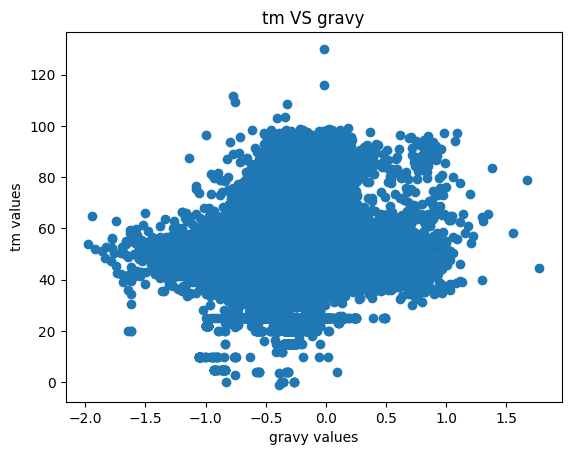

In [28]:
# Plotting the relation between C and tm
gravy = data['gravy']
plt.scatter(gravy, tm)
plt.xlabel('gravy values')
plt.ylabel('tm values')
plt.title('tm VS gravy')

In [29]:
# GRAVY ---------->

In [30]:
gravy_val = np.array(data['gravy']).reshape(-1, 1)

In [31]:
gravy_model = HuberRegressor(epsilon=1.85, max_iter=200, alpha=0.01, warm_start=False, fit_intercept=True, tol=1e-04)
gravy_model.fit(gravy_val, y)

HuberRegressor(alpha=0.01, epsilon=1.85, max_iter=200, tol=0.0001)

In [32]:
gravy_test = np.array(x_test['gravy']).reshape(-1, 1)
y_pred_gravy = gravy_model.predict(gravy_test)
y_pred_gravy[:10]

array([46.32202334, 46.31235398, 46.38829143, 46.65319895, 46.66045097,
       46.58309609, 46.51541056, 46.70154576, 46.55892268, 46.57584406])

In [33]:
mae2 = mean_absolute_error(y_pred_gravy, y_test)
mse2 = mean_squared_error(y_pred_gravy, y_test)
print("mae: ", mae2, "mse: ", mse2)

mae:  25.770283069250468 mse:  714.0990208814895


In [34]:
# CHARGE ---------->

In [35]:
charge_val = np.array(data['charge']).reshape(-1, 1)

In [36]:
charge_model = HuberRegressor(epsilon=1.85, max_iter=200, alpha=0.01, warm_start=False, fit_intercept=True, tol=1e-04)
charge_model.fit(gravy_val, y)

HuberRegressor(alpha=0.01, epsilon=1.85, max_iter=200, tol=0.0001)

In [37]:
charge_test = np.array(x_test['charge']).reshape(-1, 1)
y_pred_charge = gravy_model.predict(charge_test)
y_pred_charge[:10]

array([64.11191979, 74.74216396, 69.45273639, 63.6776432 , 64.16330882,
       64.16330882, 64.21384498, 64.16330882, 69.45273639, 68.96707077])

In [38]:
mae2 = mean_absolute_error(y_pred_charge, y_test)
mse2 = mean_squared_error(y_pred_charge, y_test)
print("mae: ", mae2, "mse: ", mse2)

mae:  7.463277291366956 mse:  78.74919494897273


In [39]:
# AROMATICITY ---------->

In [40]:
aromaticity_val = np.array(data['aromaticity']).reshape(-1, 1)

In [41]:
aromaticity_model = HuberRegressor(epsilon=1.85, max_iter=200, alpha=0.01, warm_start=False, fit_intercept=True, tol=1e-04)
aromaticity_model.fit(aromaticity_val, y)

HuberRegressor(alpha=0.01, epsilon=1.85, max_iter=200, tol=0.0001)

In [42]:
aromaticity_test = np.array(x_test['aromaticity']).reshape(-1, 1)
y_pred_aromaticity = gravy_model.predict(aromaticity_test)
y_pred_aromaticity[:10]

array([50.97298589, 50.97298589, 50.97540323, 50.97298589, 50.99715929,
       50.97298589, 50.97298589, 50.97298589, 50.97298589, 50.97298589])

In [43]:
mae2 = mean_absolute_error(y_pred_aromaticity, y_test)
mse2 = mean_squared_error(y_pred_aromaticity, y_test)
print("mae: ", mae2, "mse: ", mse2)

mae:  21.381038356485266 mse:  505.1954165617328


Text(0.5, 1.0, 'tm VS length')

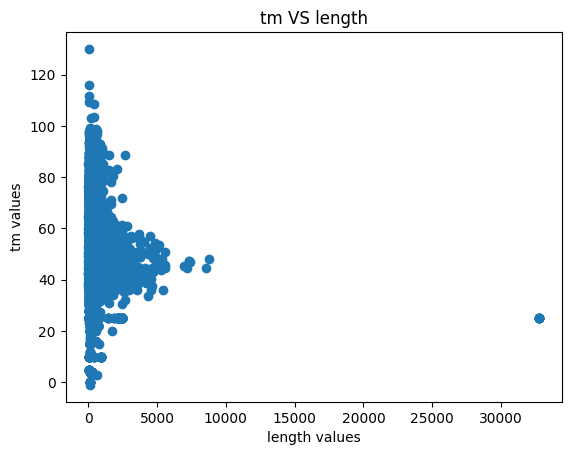

In [44]:
# Plotting the relation between len and tm
length = data['length']
plt.scatter(length, tm)
plt.xlabel('length values')
plt.ylabel('tm values')
plt.title('tm VS length')

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
seq_id,31075.0,15609.536444,9035.340077,0.000000,7798.500000,15574.000000,23358.500000,3.138900e+04
pH,31075.0,6.850945,0.859904,1.990000,7.000000,7.000000,7.000000,1.100000e+01
tm,31075.0,49.191688,13.986443,-1.000000,42.100000,48.100000,53.800000,1.300000e+02
Q,31075.0,0.040738,0.018828,0.000000,0.029361,0.038462,0.050279,2.434641e-01
I,31075.0,0.054596,0.021760,0.000000,0.041002,0.053435,0.067073,2.290503e-01
N,31075.0,0.042674,0.018502,0.000000,0.030568,0.041131,0.052834,3.198992e-01
L,31075.0,0.093320,0.026775,0.000000,0.076923,0.091408,0.106987,2.815013e-01
A,31075.0,0.079030,0.028245,0.000000,0.059172,0.076419,0.094412,2.986577e-01
G,31075.0,0.069663,0.025325,0.000000,0.053571,0.066841,0.083333,6.091954e-01
E,31075.0,0.070426,0.025174,0.000000,0.054645,0.068460,0.083871,2.465753e-01
